In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [29]:
%run linear_algebra.py

# 확률
> 어떠한 사건의 공간에서 특정 사건이 선택될 때 발생하는 불확실성을 수치적으로 나타낸 것
- 확률 표본
- 표본 공간
- 사건
- 결합 확률
- 조건부 확률
- 독립
- 베이즈 정리

> ## 생활 속의 확률
- 동전을 한번 던졌다. 동전이 앞면이 나올 것인가 뒷면이 나올 것인가?
- 주사위를 던져 하나의 숫자가 나왔다. 이 숫자는 무엇인가?
- 삼성전자 주식의 가격은 내일 몇 % 오를까?

- 위 문제들의 공통점은?

In [1]:
## 이 문제들의 공통점은 답을 100% 확신할 수 없다는 점이다. 
# 어떤 문제는 무엇이 답인지 전혀 예측할 수 없는 것도 있고 어떤 문제는 어느 정도 정확도 혹은 범위내에서 예측할 수 있는 것도 있다. 
# 확률론은 이러한 문제가 어떤 답을 가질 수 있고 그 답의 신뢰성을 계산하는 정량적인 방법을 제시한다.

## 1.확률 표본 (표본, sample)
- <a>우리가 풀고자 하는 확률적 문제에서 선택될 수 있는 혹은 답이 될 수 있는 하나의 경우 혹은 숫자를 말한다.<a>

## 2. 표본 공간 (sample space)
- 답이 될 수 있는 혹은 선택될 수 있는 모든 표본의 집합
    - $\Omega$(오메가)로 표기함
   

> ### <a>우리가 원하는 답이란, 표본 공간 (sample space) 에서 선택된 어떤 특정 표본 (sample) 을 말한다.<a>
- 예시
    - 돈 전을 한 번 던지는 문제
        - 표본 : 앞면 (Head), 뒷면 (Tail)
        - 표본 공간 : $\Omega_1$ = $\{앞면(Head), 뒷면(Tail)\}$ 


- 주사위를 던져 나오는 숫자를 구하는 문제를 확률적으로 접근할 때, 표본 공간은?

In [2]:
## - {1, 2, 3, 4, 5, 6}

- 내일 삼성 전자의 주식에 대한 표본 공간은?

In [3]:
## (x: 0.7 <= x <= 1.3)

## 3. 사건 (event)

- <a>사전 (event)는 표본 공간 $\Omega$의 부분 집합
    - <a>즉, 전체 표본 공간 중에서 우리가 관심을 가지고 있는 일부 표본의 집합을 뜻한다.
    - 보통 대문자 알파벳으로 표기한다.
- 동전 던지기 예시에서 가능한 사건 (부분집합)
    - A = $\{\}$ 
    - B = $\{H\}$
    - C = $\{T\}$
    - D = $\{H, T\}$ = $\Omega$

> ### 파이썬으로 집합 정의하기

In [18]:
A = set([])
B = set(['H'])
C = set(['T'])
D = set(['H', 'T'])

In [19]:
sample_space = set([A, B, C, D])

TypeError: unhashable type: 'set'

In [22]:
## 파이썬으로 부분집합을 정의하기 위해서는 frozenset 이라는 자료형을 사용해야된다.
## set은 set 자료형을 key값으로 가지지 못하기 때문이다.

A = frozenset([])
B = frozenset(['H'])
C = frozenset(['T'])
D = frozenset(['H', 'T'])

In [21]:
sample_space = set([A, B, C, D])

## 4. 확률
- 확률 (probability)이란 사건 (부분 집합)을 입력하면 숫자 (확률값)이 출력되는 함수이다.
    - 사건 (부분집합) -> 숫자
    - <a>각각의 사건 (부분집합)에 어떤 숫자를 할당(allocate)한 것이다. 보통 대문자 알파벳 P로 나타낸다.<a>
    - P는 함수이고, P(A)는 A라는 사건에 할당된 숫자를 뜻한다.
    
    
- 확률의 공리 (Komogrov's axioms)
    - 모든 사건에 대해 확률은 실수이고 양수이다.
    - 표본공간이라는 사건에 대한 확률은 1이다.
        - $P(\Omega) = 1$
    - 공통 원소가 없는 두 사건의 합집합의 확률은 각각의 사건의 확률의 합이다.
        - $A\cap B = \emptyset$   -> $P(A\cup B) = P(A) + P(B)$

- ***공리(公理, 영어: axiom)는 어떤 이론체계에서 가장 기초적인 근거가 되는 명제(命題)이다. 어떤 다른 명제들을 증명하기 위한 전제로 이용되는 가장 기본적인 가정을 가리킨다.   
지식이 참된 것이 되기 위해서는 근거가 필요하나 근거를 소급해 보면 더 이상 증명하기가 곤란한 명제에 다다른다. 이것이 바로 공리이다. 참고로 증명이 필요한 명제중 증명이 완료된 명제를 정리라고 한다. (Wikipedia)***

In [23]:
## 동전의 예시에 확률값을 부여해보자

P = {A: 0, B: 0.4, C: 0.6, D: 1}
P

{frozenset(): 0,
 frozenset({'H'}): 0.4,
 frozenset({'T'}): 0.6,
 frozenset({'H', 'T'}): 1}

In [25]:
## 앞면이 나오는 확률이 0.4인 동전이다.
## 콜모고로프의 공리만 지킨다면 각각의 사건(부분집합)에 대한 확률값은 어떤 값도 할당할 수 있다.

> #### 확률에 대해 사람들이 흔히 가지고 있는 오해는 확률이 "표본 하나 하나에 대해 정의되어 있는 숫자"라는 것이다.  
#### 확률은 표본이 아닌 사건 (부분집합)에 대해 정의되어야 한다.


- P(1) = 1/6 (x)
- P({1}) = 1/6 (o)

In [26]:
## 확률을 표본이 아닌 사건에 할당하게 되면, 표본의 수가 무한한 경우를 다룰 수 있게 된다.

> ### <a>표본의 수가 무한한 경우<a>
- 시계이 시침이 모든 각도에 대해 가능성이 똑같다면, 시침이 12시를 가르킬 확률은?
    - 표본의 수가 무한하므로 확률은 0이다.

In [27]:
# 왜 그럴까. 모든 각도에 대해 가능성이 똑같으므로 그 확률을  x 라는 값이라고 하자. 
# 그런데 각도가 나올 수 있는 경우는 무한대의 경우가 있으므로 만약  x가 0이 아니라면  x×∞=∞ 로 전체 표본 집합의 확률이 무한대가 된다. 
# 즉, 1이 아니다. 따라서 표본의 수가 무한하고 모든 표본에 대해 표본 하나만을 가진 사건의 확률이 동일하다면, 표본 하나에 대한 사건의 확률은 언제나 0이다.

## 5. 결합 확률 (joint probability)
- <a>사건 A와 B가 동시에 발생할 확률<a>
    - $P(A\cap B)$ 또는 $P(A, B)$

## 6. 조건부 확률 (conditional probability)
- <a>B가 사실일 경우, 사건 A에 대한 확률을 사건 B에 대한 사건 A의 조건부 확률이라고 한다.<a>
    
    - $P(A|B) = \frac {P(A, B)}{P(B)}$
    
    
> **조건부 확률이 왜 위와 같이 되는가?**
- (1) 사건 B가 사실이므로 모든 가능한 표본은 사건 B에 포함되어야 한다. 
    - 즉, 표본 공간 $\Omega$ -> B
- (2) 사건 A의 원소는 모두 사건 B의 원소도 되므로 사실상 사건 $A \cap B$가 원소가 된다.
    - 즉, A -> $A \cap B$
- (3) 따라서 사건 A의 확률 즉, 신뢰도는 원래의 신뢰도 (결합 확률)를 새로운 표본 공간의 신뢰도 (확률)로 정규화(normalize)한 값이라고 할 수 있다.

## 7. 독립
- <a>$P(A, B) = P(A)P(B)$ 관계가 성립하면 두 사건 A와 B는 서로 독립(independent)라고 정의한다.
- 독립인 경우 조건부 확률과 원래의 확률이 같아짐을 알 수 있다. 즉,  B 라는 사건이 발생하든 말든 사건  A 에는 전혀 영향을 주지 않는 다는 것이다.
    - $P(A|B) = \frac {P(A, B)}{P(B)} = \frac {P(A)P(B)}{P(B)} = P(A)$

> ## 원인과 결과, 근거와 추론, 가정과 조건부 결론
조건부 확률 P(A|B)에서 B, A는 각각
- "원인과 결과" 또는
- "근거와 추론" 또는
- "가정과 그 가정에 따른 조건부 결론" 으로 생각할 수 있다.


사건  B 가 발생한다는 가정(근거, 조건)에서 사건  A의 확률을 계산하기 때문에 사건  B가 주장 사건  A의 근거가 되기 때문이며   
또한 사건  B가 발생하지 않는다면 사건  A에 대해 고려할 필요도 없을 것이기 때문이다.

- 조건부 확률의 정의는 $P(A, B) = P(A|B)P(B)$로도 정의가 가능하다.
    > - A, B가 모두 발생할 확률은 B라는 사건이 발생할 확률과 그 사건이 발생한 경우 다시 A가 발생한 경우의 곱

## 8. 베이즈 정리

> 
- <a>사건 B가 발생함으로써 (사건 B가 진실이라는 것을 알게 됨으로써 즉, 사건 B의 확률 P(B)=1 이라는 것을 알게 됨으로써) 사건 A의 확률이 어떻게 변화하는지 표현한 정리
- 사건 B가 발생하였다는 것은 우리가 찾는 샘플이 사건 B라는 부분집합에 포함되어 있다는 새로운 정보를 취득하였다는 의미이다.
- 즉, 베이즈 정리는 새로운 정보가 기존의 의사 결정에 어떻게 영향을 미치는지 설명한다.<a>

### $$P(A|B) = \frac {P(B|A)P(A)} {P(B)}$$

- P(A) : 사전 확률 (prior), 사건 B가 발생하기 전에 가지고 있던 사건 A의 확률
- P(A|B) : 사후 확률 (posterior), 사건 B가 발생한 이후 갱신된 사건 A의 확률
- P(B|A) : likelihood, 사건 A가 발생한 경우 사건 B의 확률
- P(B) : 정규화 상수 (normalizing constant), 확률의 크기 조정

> ## 베이즈 정리 확장 1

### $$P(A|B) = \frac {P(B|A)P(A)} {P(B)} = \frac {P(B|A)P(A)} {P(B \cap A) + P(B \cap A^\mathrm{C})} = \frac {P(B|A)P(A)} {P(B|A)P(A) + P(B|A^\mathrm{C})P(A^\mathrm{C})} = \frac {P(B|A)P(A)} {P(B|A)P(A) + P(B|A^\mathrm{C})(1-P(A))}$$


- 검사 시약 문제
    - 질병에 걸릴 확률 : 0.0001
    - 검사가 정확할 확률 : 0.01
    - 사건 T : 양성판정
    - 사건 D : 질병에 걸리는 사건
    - 양성 판정을 받았을 경우 실제로 병에 걸렸을 확률은?
###        $P(D|T) = \frac {P(T|D)P(D)} {P(T)}$

In [30]:
d = 0.0001 ## 질병에 걸릴 확률 , P(D)
t_d = 0.99 ## 검사가 정확할 확률 (= 질병이 있는 사람이 양성 판정을 받을 확률 ),  P(T|D)

d_t = t_d * d / (t_d * d + (1-t_d)*(1-d))  ## P(D|T) = P(T|D)P(D) / ( P(D|T)P(T) + P(D|ㄴT)P(ㄴT))

d_t

0.009803921568627442

> ## 베이즈 정리 확장 2
- 베이즈 정리는 사건 A의 확률이 사건 B에 의해 갱신 (update)된 확률을 계산한다. 그 상태에서 추가적인 사건 C가 발생했다면 베이즈 정리는 다음과 같이 쓸 수 있다.

### $$P(A|B \cap C) = \frac {P(C|A \cap B)P(A|B)} {P(C|B)}$$

## 9. 확률 변수
- <a>특정 확률 분포와 연관되어 있는 변수를 의미한다.<a>

> ### (1) 이산 확률 변수 ( discrete random variable )
- 확률 변수값이 연속적이지(continuous) 않고 떨어져(discrete) 있는 경우 
    - ex. 주사위

> ### (2) 연속 확률 변수 ( continuous random variable )
- 확률 변수의 값이 실수 집합처럼 연속적이고 무한개의 경우의 수를 가진 경우
    - ex. 시계 바늘의 위치

## 10. 연속 분포

- 무한히 많은 숫자가 존재할 때 (시계 바늘의 위치 ), 숫자 하나의 비중은 0에 가깝기 때문에 특정 구간에서 적분한 값으로 확률을 나타낸다.



> ### 누적 확률 밀도 함수 (cumulative probability density function)
- 위와 같은 분포를 표현하기 위해 사용된다.
- 일반적으로 $cdf$는 대문자를 사용하여  $F(x)$와 같은 기호로 표시하며 이 때 독립 변수  $x$는 범위의 끝을 뜻한다. 
- 범위의 시작은 일반적으로 음의 무한대(negative infinity,  $−∞$ ) 값을 사용한다.

In [9]:
## x가 0보다 작을때는 확률이
def uniform_cdf(x):
    """균등 분포를 따르는 확률변수의 값이 x보다 작거나 같을 확률을 반환
        균등 분포 : 모든 값에 대해 동등한 비중을 준 분포"""
    if x < 0 : return 0
    elif x < 1 : return x
    else: return 1

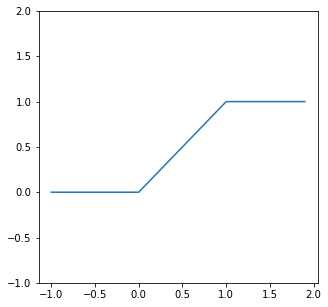

In [22]:
plt.figure(figsize=(5, 5))
x_range = [x for x in np.arange(-1, 2, 0.1)]
plt.plot(x_range, [uniform_cdf(x) for x in np.arange(-1, 2, 0.1)])
plt.ylim(-1, 2)
plt.show()

In [ ]:
############################# 스터디원 코드 #############################





> ### 확률 밀도 함수 (probability density function, pdf)
- 누적밀도함수는 어떤 값이 더 자주나오든가 혹은 더 가능성이 높은지에 대한 정보를 알기 힘들다.
- 이를 알기 위해서는 전체 구간을 아주 작은 폭을 가지는 구간들로 나눈 다음 각 구간의 확률을 살펴보는 것이 편리하다.
- 각 구간을 나누기 위해 미분 (differentiation)을 사용한다.
    - ### $f(x) = \frac {dF(x)} {dx}$

In [29]:
## 균등 분포의 확률밀도함수
## 이해를 쉽게하기 위해 균등분포로 구현함

def uniform_pdf(x):
    return 0.1 if x >= 0 and x < 1 else 0

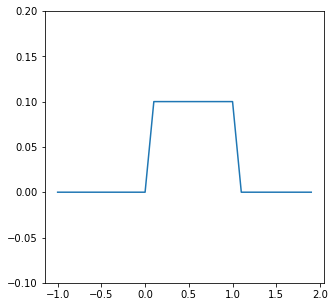

In [32]:
plt.figure(figsize=(5, 5))
x_range = [x for x in np.arange(-1, 2, 0.1)]
plt.plot(x_range, [uniform_pdf(x) for x in np.arange(-1, 2, 0.1)])  # np.arange()는 소수점 단위로도 iteration 구간을 만들 수 있다.
plt.ylim(-0.1, 0.2)
plt.show()

## 11. 정규분포
- 자연 현상에서 많이 나타나는 숫자를 확률 모형으로 모형화할 때 가장 많이 사용된다.
- 종형 곡선 모양의 분포이며, 평균과 표준편차로 정의된다.
    - 평균 : 종의 중심이 어디인지
    - 종의 폭이 얼마나 넓은지
    
- 정규 분포의 밀도 함수
### $ f(x | \mu, \sigma) = \frac {1} {\sqrt {2\pi}\sigma} exp(-\frac {(x - \mu )^2} {2 \sigma ^2})  $

In [95]:
## 정규 분포 구현

def normal_pdf(x, mu = 0, sigma = 1):
    import math
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu)**2 / 2 / sigma**2) / (sqrt_two_pi * sigma))

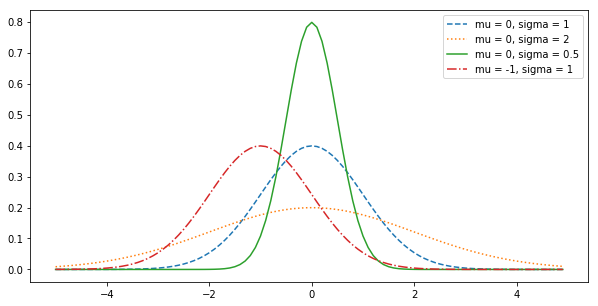

In [103]:
xs = [x/10 for x in range(-50, 50)]
plt.figure(figsize=(10, 5))
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '--', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], ':', label = 'mu = 0, sigma = 2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], '-', label = 'mu = 0, sigma = 0.5')
plt.plot(xs, [normal_pdf(x, mu = -1) for x in xs], '-.', label = 'mu = -1, sigma = 1')
plt.legend()
plt.show()

In [ ]:
############################# 스터디원 코드 #############################





> scipy를 활용한 정규분포 

In [39]:
## scipy 호출, 일반적으로 sp라는 약어로 표기한다.

import scipy as sp

In [79]:
# 정규분포를 따르는 확률 변수 생성

rv = sp.stats.norm(0, 1)

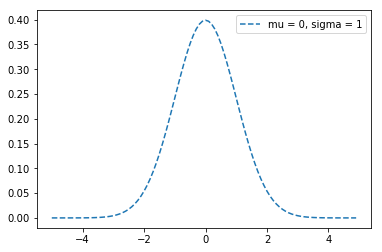

In [44]:
xs = [x/10 for x in range(-50, 50)]
plt.plot(xs, [rv.pdf(x) for x in xs], '--', label = 'mu = 0, sigma = 1')
plt.legend()
plt.show()

> ### 표분 정규 분포
- 평균이 0이고, 표준편차가 1인 정규분포
- X가 평균이 $\mu$ 이고 표준편차가 $\sigma$인 정규분포의 확률 변수라면, 다음과 같이 표준정규분포를 표현할 수 있다.
### $Z = \frac{X-\mu} {\sigma}$

In [45]:
## 표준정규분포의 누적분포함수 구현
## error function으로 누적분포 함수 구현 (적분)
## https://en.wikipedia.org/wiki/Error_function

def normal_cdf(x, mu=0,sigma=1):
    import math
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

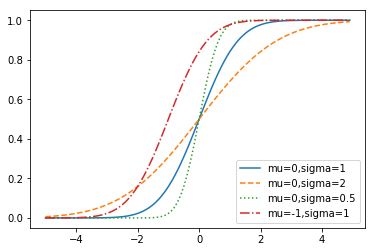

In [46]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # 우측 하단
plt.show()

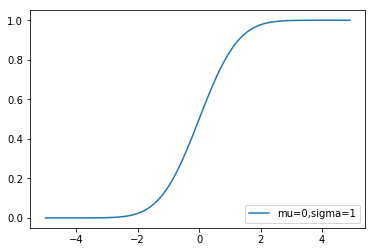

In [47]:
## scipy

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[rv.cdf(x) for x in xs],'-',label='mu=0,sigma=1')
plt.legend(loc=4) # 우측 하단
plt.show()

In [ ]:
############################# 스터디원 코드 #############################





In [48]:
## 결국 궁금한 것은 특정 확률을 가지는 어떠한 값이다.
## 

def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """이진 검색 알고리즘을 사용해서 역함수 근사"""
    
    # 표준정규분포가 아니라면 표준정규분포로 변환
    
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10)는 0에 근접
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)는 1에 근접
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # 중간 값
        mid_p = normal_cdf(mid_z)      # 중간 값의 누적분포 값을 계산
        if mid_p < p:
            # 중간 값이 너무 작다면 더 큰 값들을 검색
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # 중간 값이 너무 크다면, 더 작은 값들을 검색
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

In [49]:
inverse_normal_cdf(0.7)

0.5243968963623047

In [56]:
def inverse_normal_cdf_plot(p, mu=0, sigma=1, tolerance=0.00001):
    """이진 검색 알고리즘을 사용해서 역함수 근사"""
    
    # 표준정규분포가 아니라면 표준정규분포로 변환
    
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0            # normal_cdf(-10)는 0에 근접
    hi_z,  hi_p  =  10.0, 1            # normal_cdf(10)는 1에 근접
    n = 0
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # 중간 값
        n += 1
        plt.scatter(mid_z, normal_cdf(mid_z))
        plt.annotate("{0}".format(n), xy = [mid_z, normal_cdf(mid_z) + 0.001], xytext = [mid_z-0.2, normal_cdf(mid_z)])
        mid_p = normal_cdf(mid_z)      # 중간 값의 누적분포 값을 계산
        if mid_p < p:
            # 중간 값이 너무 작다면 더 큰 값들을 검색
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # 중간 값이 너무 크다면, 더 작은 값들을 검색
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    plt.show()
    return mid_z, normal_cdf(mid_z)

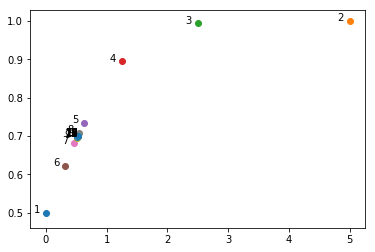

(0.5243968963623047, 0.6999987426221049)

In [73]:
inverse_normal_cdf_plot(0.7)

In [85]:
## scipy
## ppf : percent point function (inverse of cdf — percentiles)

rv.ppf(0.7)

0.52440051270804067

In [ ]:
############################# 스터디원 코드 #############################





In [127]:
# 이진 검색 알고리즘(binary search algorithm)은 오름차순으로 정렬된 리스트에서 특정한 값의 위치를 찾는 알고리즘이다. 
# 처음 중간의 값을 임의의 값으로 선택하여, 그 값과 찾고자 하는 값의 크고 작음을 비교하는 방식을 채택하고 있다. 
# 처음 선택한 중앙값이 만약 찾는 값보다 크면 그 값은 새로운 최고값이 되며, 작으면 그 값은 새로운 최하값이 된다. 
# 검색 원리상 정렬된 리스트에만 사용할 수 있다는 단점이 있지만, 검색이 반복될 때마다 목표값을 찾을 확률은 두 배가 되므로 속도가 빠르다는 장점이 있다.

In [121]:
## 0%, 50%, 90%, 95%, 97.5%

[inverse_normal_cdf(x) for x in [0, 0.5, 0.90, 0.95, 0.975, 1]]

[-8.75, 0.0, 1.2815570831298828, 1.6448497772216797, 1.9599628448486328, 8.75]

In [ ]:
############################# 스터디원 코드 #############################





## 12. 중심극한정리
> - 동일한 분포에 대한 독립적인 확률변수의 평균을 나타내는 확률 변수가 대략적으로 정규분포를 따른다는 정리이다.

> ### 이항확률변수
- 확률모형이 이항분포를 따른다는 가정하에 만들어진 확률변수
- 베르누이 시행을 n번 한 것과 같다.
    - 베르누이 시행 : 결과가 성공, 실패 둘 중 하나만으로 나오는 것
- n과 p로 구성된다.
- 베르누이 확률변수
    - 평균 : $p$
    - 표준편차 : $\sqrt {p(1-p)}$
- 이항확률변수
    - 평균 : $np$
    - 표준편차 : $\sqrt {np(1-p)}$

In [205]:
## 베르누이 시행 구현
def bernoulli_trial(p):
    import random
    return 1 if random.random() < p else 0

In [201]:
## 이항확률변수 구현
def binomial(p, n):
    return sum(bernoulli_trial(p) for _ in range(n))

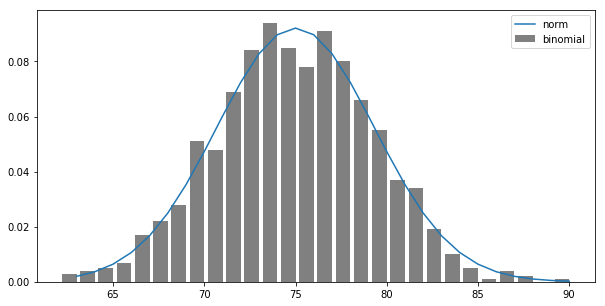

In [231]:
## n이 충분히 크다면, 이항확률변수는 정규분포 확률변수에 근사한다.

def make_hist(p, n, num_points):
    from collections import Counter
    import math
    
    data = [binomial(p, n) for _ in range(num_points)]
    
    # 이항분포를 막대그래프로 표현
    histogram = Counter(data)  # 빈도수 세기
    plt.figure(figsize = (10, 5))
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8, color = 'grey', label = 'binomial')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # 근사된 정규 분포 
    xs = range(min(data), max(data) + 1)
    ys = [normal_pdf(i, mu, sigma) for i in xs]
    plt.plot(xs,ys, label = 'norm')
    plt.legend()
    plt.show()

make_hist(0.75,100,1000)

In [ ]:
############################# 스터디원 코드 #############################



